Aluno: Leonardo Martelotte

Matrícula: 0050015200

In [1]:

import pandas as pd
from sklearn.datasets import load_boston

dataset = load_boston()
data = pd.DataFrame(dataset.data)
data.columns = dataset.feature_names

1-Mostre os primeiros registros da tabela

In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


2-Observações(linhas) possui nessa base? Quantas Colunas?

506 linhas e 13 colunas.

In [3]:
data.shape

(506, 13)

3-Quantas Features Possui?

13 features

In [4]:
len(dataset.feature_names)

13

4-Qual é o campo Target(respostas) dessa base?

MEDV

In [5]:
data['MEDV'] = dataset.target

5-Usando a biblioteca de visualização seaborn, plote o gráfico que mostra a relação entre as features e responses

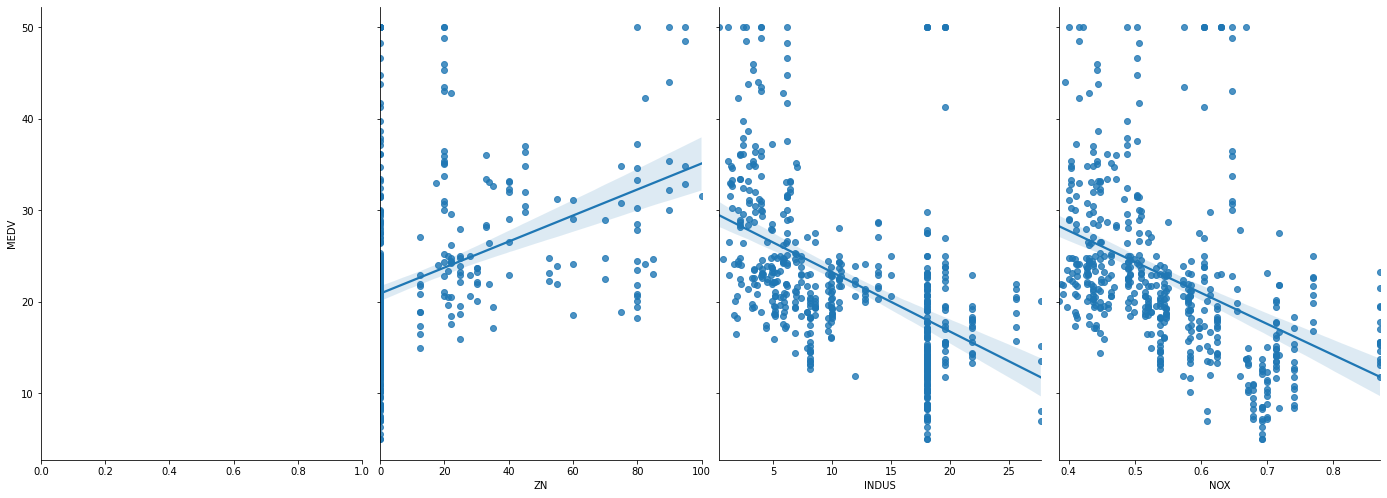

In [10]:
import seaborn as sns

%matplotlib inline

sns.pairplot(data, x_vars=['','ZN','INDUS','NOX'], y_vars='MEDV', height=7, aspect=0.7, kind='reg')

6-Prepare X e y usando o pandas

In [11]:
X = data[data.columns]
y = data['MEDV']
y = data.MEDV

7-Qual o tipo de dados de X e y?

X é do tipo dataframe e y é do tipo series

In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
type(y)

pandas.core.series.Series

8-Sobre o que se trata essa base de dados? Que tipo de informações ela guarda?

Essa base de dados traz informações sobre o mercado imobiliário de Boston. De acordo com a documentação, essas são as informações que essa base de dados guarda:

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000’s


9-Gere um X de treino e y de treino, X de teste e y da base (Split Train/Test)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

10-Qual o percentual gerado para criar o conjunto de treino e o conjunto de teste?

75% para treino e 25% para teste.

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 14)
(379,)
(127, 14)
(127,)


11-Usando modelo de regressão linear do sklearn, treine o modelo com o X e y de treino

In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

12-Imprima os atributos de "intercept" e "coefficients" que foram gerados

In [24]:
print('Intercept:')
print(linreg.intercept_)
print('\nCoefficients:')
print(linreg.coef_)

Intercept:
-8.526512829121202e-14

Coefficients:
[ 1.30092808e-16  2.08166817e-17 -9.42171688e-16  1.46876191e-15
  1.56799927e-14  1.61961509e-15 -2.55871713e-17  2.50450702e-16
  2.40692882e-16  7.63278329e-17 -2.19632255e-16  1.71737624e-16
 -1.03866568e-16  1.00000000e+00]


13-imprima o par "feature names" com os "coefficients"

In [25]:
feature_cols = dataset.feature_names
list(zip(feature_cols, linreg.coef_))

[('CRIM', 1.3009280763986442e-16),
 ('ZN', 2.0816681711721685e-17),
 ('INDUS', -9.421716878899034e-16),
 ('CHAS', 1.4687619068025348e-15),
 ('NOX', 1.567999270463312e-14),
 ('RM', 1.6196150865767367e-15),
 ('AGE', -2.5587171270657905e-17),
 ('DIS', 2.504507018441515e-16),
 ('RAD', 2.40692882291782e-16),
 ('TAX', 7.632783294297951e-17),
 ('PTRATIO', -2.1963225509125106e-16),
 ('B', 1.717376241217039e-16),
 ('LSTAT', -1.0386656812411132e-16)]

14-Faça uma previsão usando o conjunto de X de teste

In [26]:
y_pred = linreg.predict(X_test)
print(y_pred)

[37.6 27.9 22.6 13.8 35.2 10.4 23.9 29.  22.8 23.2 33.2 19.  20.3 36.1
 24.4 17.2 17.9 19.6 19.7 15.   8.1 23.  44.8 23.1 32.2 10.8 23.1 21.2
 22.2 24.1 17.3  7.  12.7 17.8 26.4 19.6 25.1  8.3 48.8 34.9 13.8 14.4
 30.1 12.7 27.1 24.8  7.  20.5 21.5 14.  20.4 22.2 21.4 13.5 19.4 24.7
 43.8 14.1 28.6 19.7 16.8 23.2 16.2 41.3 22.7  8.3 18.4 24.7 21.7 20.6
 16.7 22.1 19.4 27.5 27.9 30.1 17.4 15.4 31.  14.2 19.6 50.  21.7 11.7
 19.4 13.  17.5  9.7 20.3 18.6 50.  19.6 21.4 18.4 22.6 25.  15.6 26.6
 22.4 13.1 23.  24.5 13.1 50.   8.8 20.6 12.1 50.  24.1 16.1 23.9 24.3
 13.1 30.3 15.2 13.8 26.4 16.6 18.9 17.6 18.7 33.4 20.7 17.1 23.4 26.5
 21.4]


15-Mostre a margem de error, usando o método "Root Mean Squared Error (RMSE)"

In [34]:
from sklearn import metrics

true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

print((10 + 0 + 20 + 10)/4.)

print(np.sqrt(metrics.mean_squared_error(true, pred)))

10.0
12.24744871391589


16-Existe uma forma de melhorar essa margem para que fique menor? Se sim, como seria?

Existe. Basta reduzir o número de colunas.

In [35]:
import numpy as np

feature_cols = ['MEDV']

X = data[feature_cols]

y = data.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6.3794803005868234e-15
